Q1

In [12]:
columns = {
    "a": "b",
    "b": "w",
    "c": "b",
    "d": "w",
    "e": "b",
    "f": "w",
    "g": "b",
    "h": "w"
}
position = input("position?")
if(columns[position[0:1]] == "b"):
    if(int(position[1:2])%2 == 0):
        print("white")
    else:
        print("black")
else:
    if(int(position[1:2])%2 == 0):
        print("black")
    else:
        print("white")

white


Q2

In [1]:
def maximum(list1):
    return max(list1, key=lambda arr: len(arr))

def minium(list1):
    return min(list1, key=lambda arr: len(arr))

list1=[[0], [1, 3], [5, 7], [9, 11], [13, 15, 17]]
max=maximum(list1)
print(str(len(max)), str(max))
min=minium(list1)
print(str(len(min)), str(min))

3 [13, 15, 17]
1 [0]


Q3

In [5]:
class Employee:
    def __init__(self, emp_name, emp_id, emp_salary, emp_department):
        self.emp_name = emp_name
        self.emp_id = emp_id
        self.emp_salary = emp_salary
        self.emp_department = emp_department
    
    def calculate_emp_salary(self, hours_worked):
        # You can add any logic here to calculate salary
        return self.emp_salary if hours_worked<=50 else self.emp_salary+((hours_worked-50)*self.emp_salary/50)
    
    def assign_department(self, new_department):
        self.emp_department = new_department
    
    def print_employee_details(self):
        print("Employee Name:", self.emp_name)
        print("Employee ID:", self.emp_id)
        print("Employee Salary:", self.emp_salary)
        print("Employee Department:", self.emp_department)
        print()

lewis=Employee("LEWIS", "MER44", 35000, "RESEARCH")
max=Employee("MAX", "RBU01", 55000, "SALES")
charles=Employee("CHARLES", "FER16", 24000, "ACCOUNTING")
pierre=Employee("PIERRE", "ALP010", 5000, "OPERATIONS")

lewis.assign_department("HOUSE_KEEPING")
lewis.print_employee_details()
print(lewis.calculate_emp_salary(60))


Employee Name: LEWIS
Employee ID: MER44
Employee Salary: 35000
Employee Department: HOUSE_KEEPING

42000.0


Q4

In [10]:
from forex_python.converter import CurrencyRates
from datetime import datetime
from statsmodels.tsa.stattools import adfuller, kpss
import pandas as pd

currency = CurrencyRates()
df = pd.DataFrame(pd.date_range(start='1/1/2019', end='12/31/2019', freq='M'),columns=["DateTime"])
df["Rates"] = df["DateTime"].apply(lambda x: currency.get_rate("USD","CAD",x))

def adf_test(x):
    '''
    Function for performing the Augmented Dickey-Fuller test for stationarity

    Null Hypothesis: time series is not stationary
    Alternate Hypothesis: time series is stationary

    Parameters
    ----------
    x : pd.Series / np.array
        The time series to be checked for stationarity

    Returns
    -------
    results: pd.Series
        A Series with the ADF test's results
    '''

    indices = ['Test Statistic', 'p-value',
               '# of Lags Used', '# of Observations Used']

    # Perform the ADF test
    adf_test = adfuller(x, autolag='AIC')

    # Use a pandas Series to store the ADF test result and add row names
    results = pd.Series(adf_test[0:4], index=indices) # the first four items `adf_test` returned: test statistic, p-value, # of lags used,# of observations used

    # Change the row names of the critical values
    for key, value in adf_test[4].items(): # the fifth item `adf_test` returned: critical values
        # Add a new row in pandas Series results
        results[f'Critical Value ({key})'] = value

    return results

print(df["Rates"])

C:\Users\HL LEE\AppData\Local\Temp\ipykernel_5944\132906956.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = pd.DataFrame(pd.date_range(start='1/1/2019', end='12/31/2019', freq='M'),columns=["DateTime"])


ConnectTimeout: HTTPSConnectionPool(host='theforexapi.com', port=443): Max retries exceeded with url: /api/2019-01-31?base=USD&symbols=CAD&rtype=fpy (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x00000130164DA4D0>, 'Connection to theforexapi.com timed out. (connect timeout=None)'))

Q5

In [20]:
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
import requests
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from matplotlib import pyplot as plt
import scipy.stats as scs
from ./chapter_3_utils import test_autocorrelation

SyntaxError: invalid character '·' (U+00B7) (chapter_3_utils.py, line 64)

In [15]:


url = "https://data.nasdaq.com/api/v3/datasets/FRED/UNRATE.json?api_key=a_rjPxx3BtETWzqDGbC7"

r = requests.get(url)
UNRATES = r.json()
UNRATE_df = pd.DataFrame(columns=["ds","y"])
# print(UNRATES['dataset']['data'])
for UNRATE in UNRATES['dataset']['data']:
  d={'ds' : [UNRATE[0]], 'y' : [UNRATE[1]]}
  UNRATE_df = pd.concat([UNRATE_df, pd.DataFrame(d)], ignore_index=True)


             ds    y
0    2022-01-01  4.0
1    2021-12-01  3.9
2    2021-11-01  4.2
3    2021-10-01  4.6
4    2021-09-01  4.7
..          ...  ...
884  1948-05-01  3.5
885  1948-04-01  3.9
886  1948-03-01  4.0
887  1948-02-01  3.8
888  1948-01-01  3.4

[889 rows x 2 columns]


C:\Users\HL LEE\AppData\Local\Temp\ipykernel_22672\2754288551.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  UNRATE_df = pd.concat([UNRATE_df, pd.DataFrame(d)], ignore_index=True)


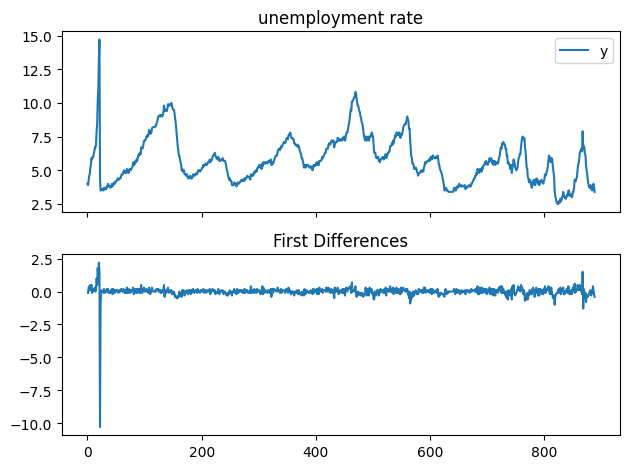

In [19]:
UNRATE_df_diff = UNRATE_df['y'].diff().dropna()

fig, ax = plt.subplots(2, sharex=True)
UNRATE_df.plot(title = "unemployment rate", ax=ax[0]) # plot the original price on the first subplot
UNRATE_df_diff.plot(title='First Differences',ax=ax[1]) # plot the first differencing price on the second subplot

plt.tight_layout()
plt.show()

Remarks:

In the above plot, we can see a more or less linear trend in unemployment rate, which indicates non-stationarity.

In [ ]:
fig = test_autocorrelation(UNRATE_df_diff) # Use the help function `test_autocorrelation`

plt.tight_layout()
plt.show()